In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
from math import sqrt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


# Data Exploration & Cleaning

In [ ]:
df.shape

(11934, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     11934 non-null  int64  
 1   Lever position                                            11934 non-null  float64
 2   Ship speed (v)                                            11934 non-null  int64  
 3   Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null  float64
 4   GT rate of revolutions (GTn) [rpm]                        11934 non-null  float64
 5   Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null  float64
 6   Starboard Propeller Torque (Ts) [kN]                      11934 non-null  float64
 7   Port Propeller Torque (Tp) [kN]                           11934 non-null  float64
 8   Hight Pressure (

In [ ]:
df.describe()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5966.500000,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,3445.193391,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,0.000000,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,2983.250000,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5966.500000,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,8949.750000,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,11933.000000,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [ ]:
df.columns

Index(['index', 'Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Compressor decay state coefficient  ',
       'GT Turbine decay state coefficient '],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
index,0
Lever position,0
Ship speed (v),0
Gas Turbine (GT) shaft torque (GTT) [kN m],0
GT rate of revolutions (GTn) [rpm],0
Gas Generator rate of revolutions (GGn) [rpm],0
Starboard Propeller Torque (Ts) [kN],0
Port Propeller Torque (Tp) [kN],0
Hight Pressure (HP) Turbine exit temperature (T48) [C],0
GT Compressor inlet air temperature (T1) [C],0


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Converting Object Type To Number

def clean_convert(column):
  column = column.str.repalce(',', '.')
  column = column.apply(lambda x: re.sub(r'[^0.9]', '', x) if isinstance(x, str) else x)
  return pd.to_numeric(column, errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     11934 non-null  int64  
 1   Lever position                                            11934 non-null  float64
 2   Ship speed (v)                                            11934 non-null  int64  
 3   Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null  float64
 4   GT rate of revolutions (GTn) [rpm]                        11934 non-null  float64
 5   Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null  float64
 6   Starboard Propeller Torque (Ts) [kN]                      11934 non-null  float64
 7   Port Propeller Torque (Tp) [kN]                           11934 non-null  float64
 8   Hight Pressure (

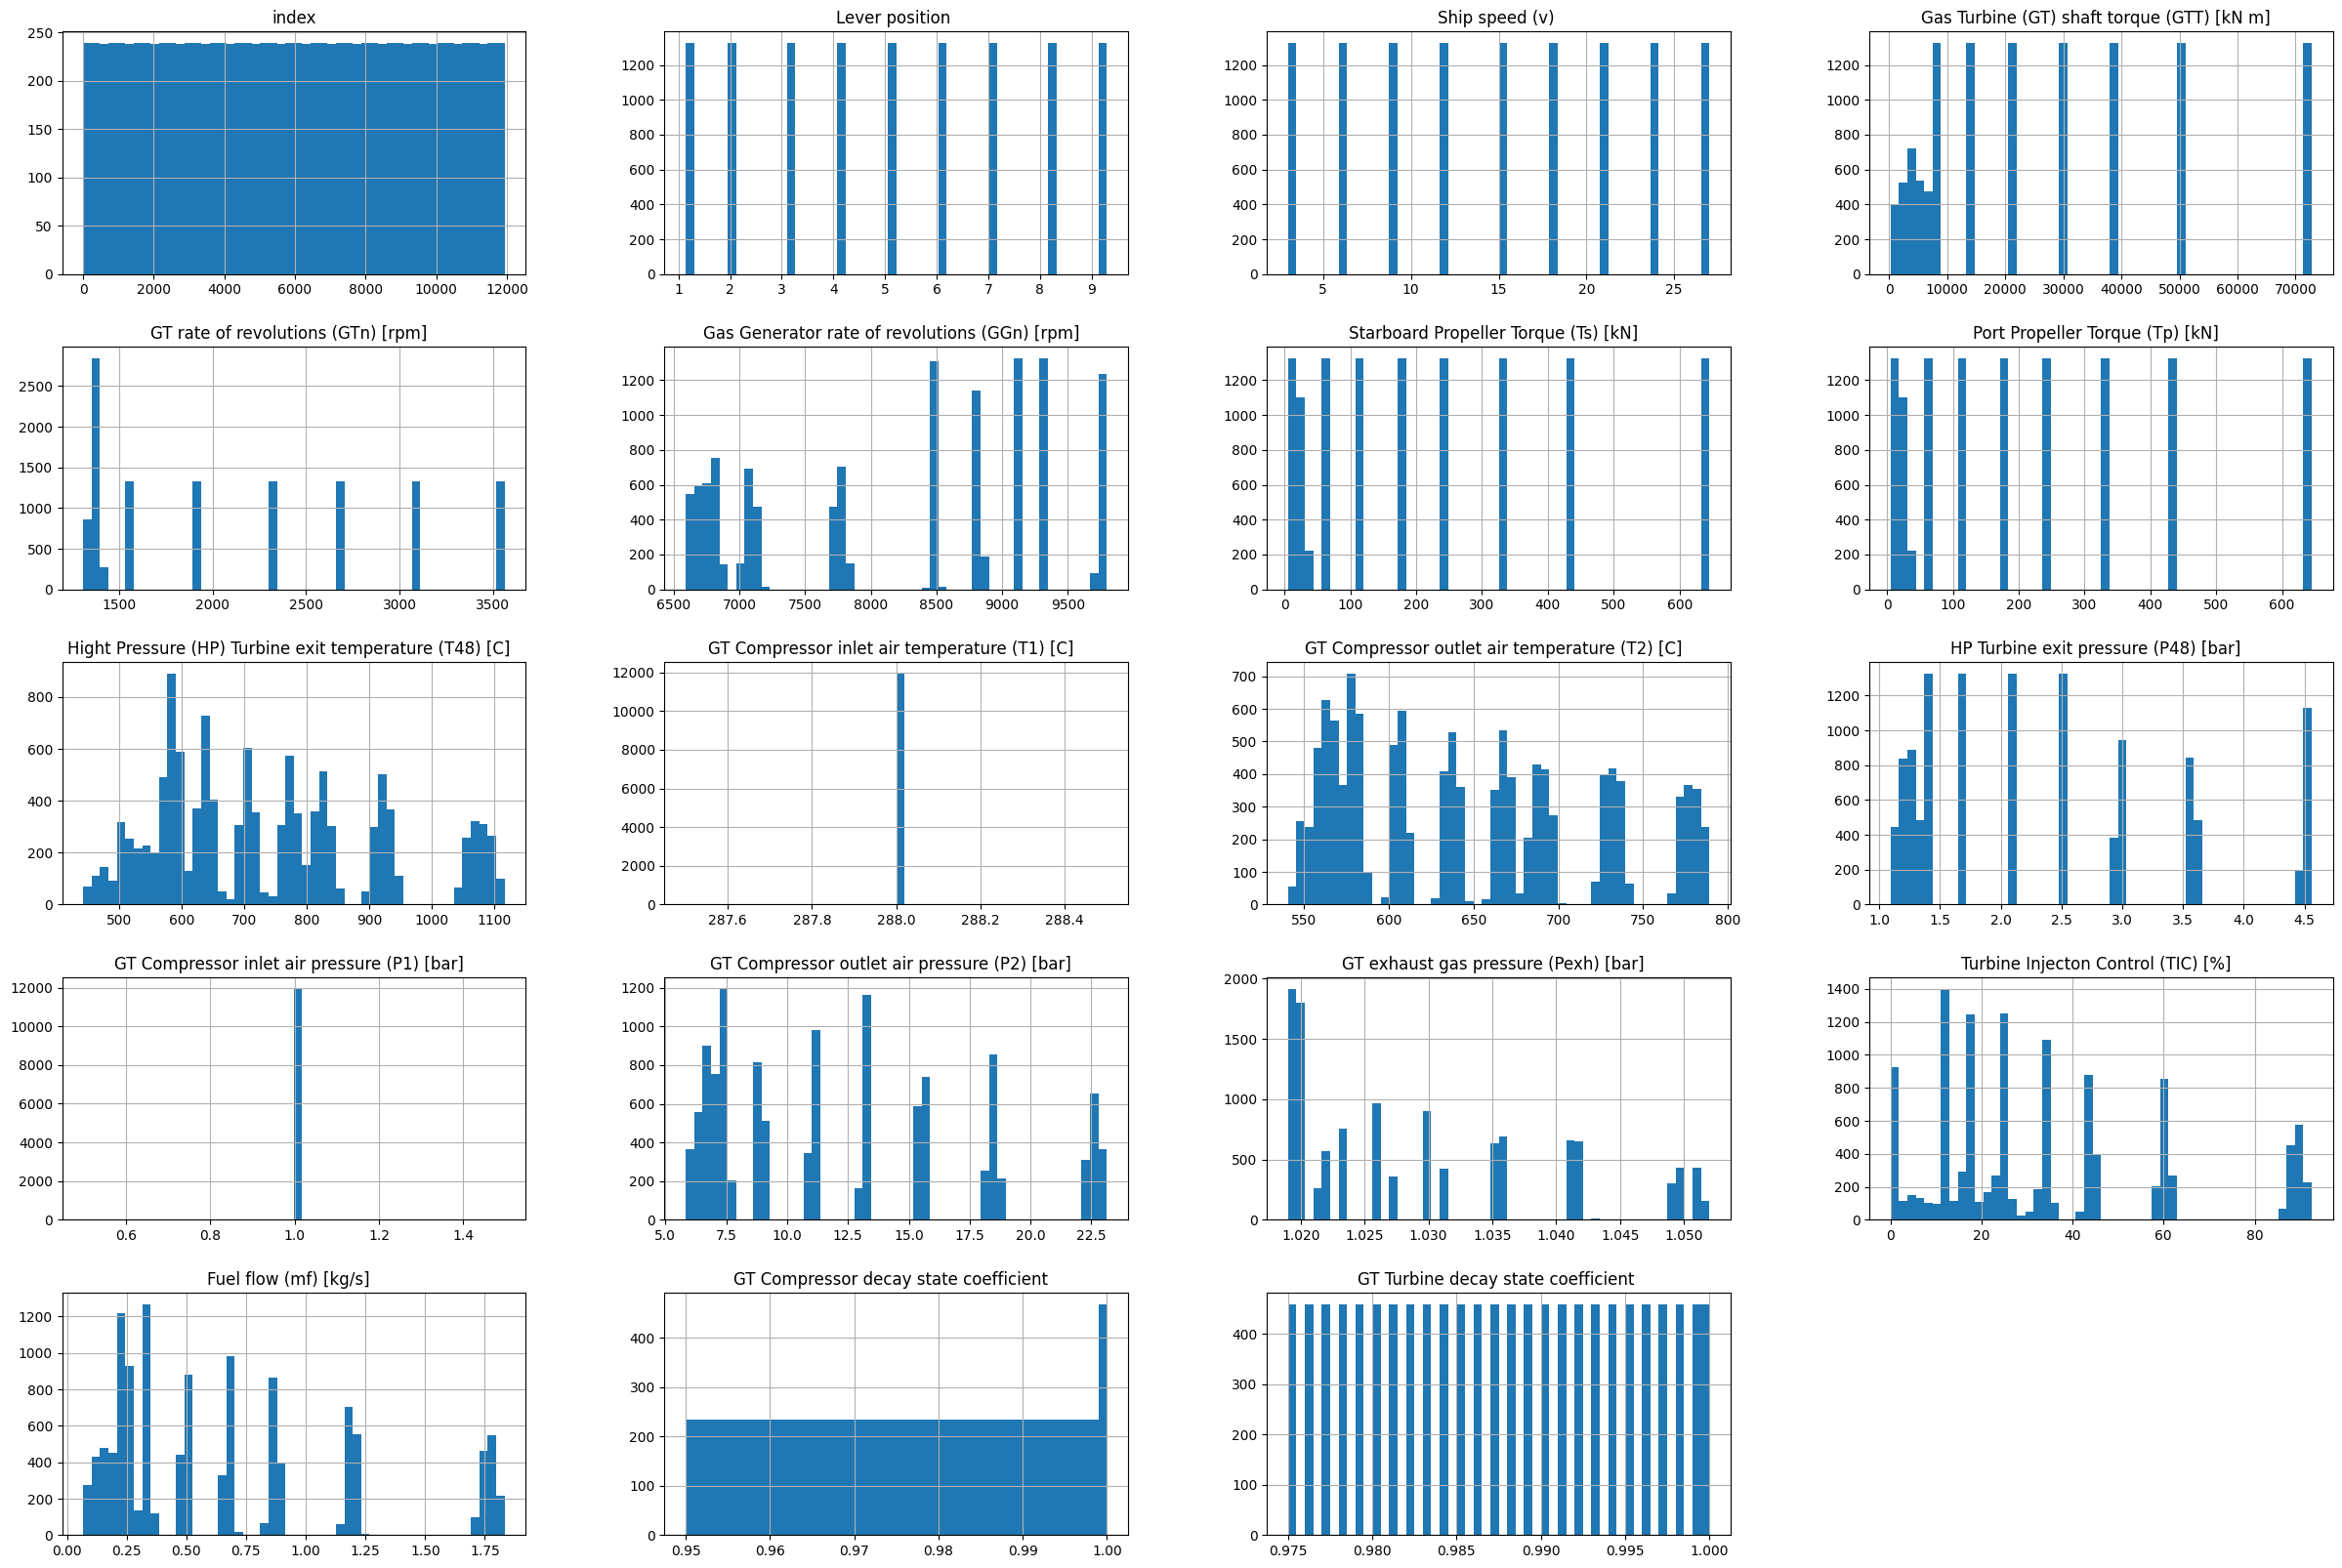

In [ ]:
df.hist(figsize = (30,20), bins = 50)
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

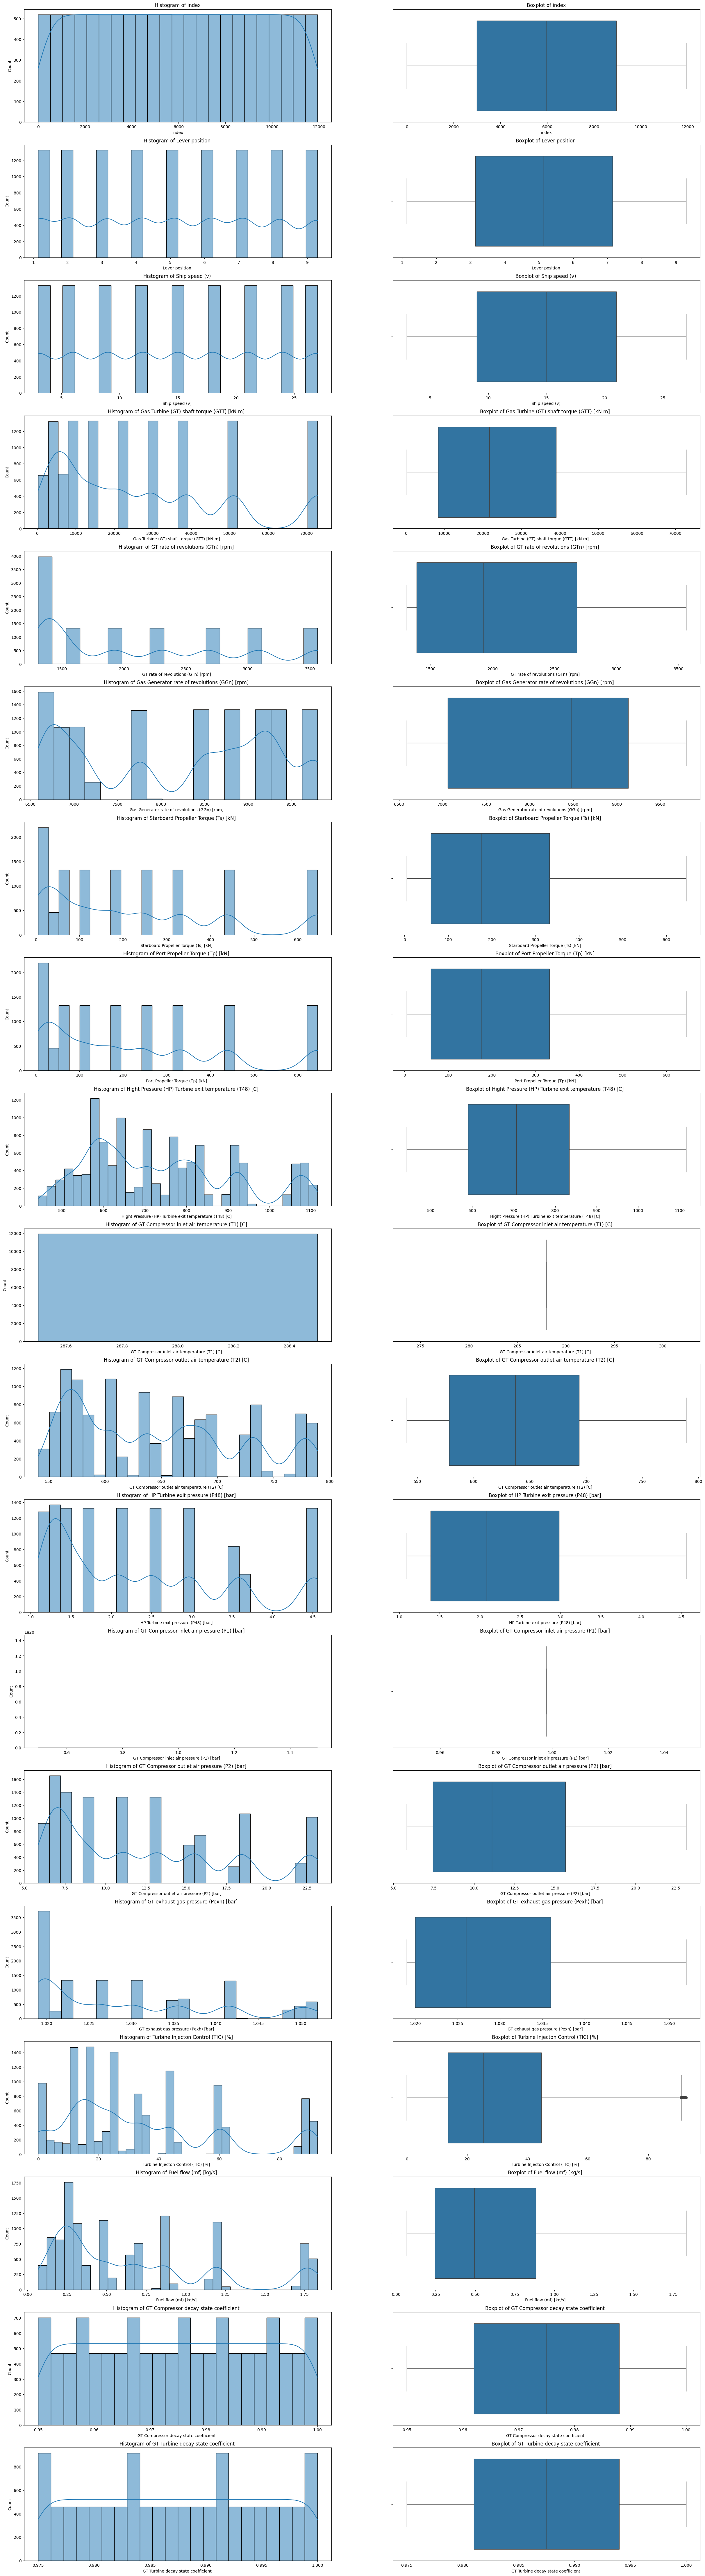

In [ ]:
n_columns = len(df.columns)
fig, ax = plt.subplots(nrows=n_columns, ncols=2, figsize=(30, 6 * n_columns))

for i, column in enumerate(df.columns):
    # Histogram
    sns.histplot(data=df, x=column, kde=True, ax=ax[i, 0])
    ax[i, 0].set_title(f'Histogram of {column}')

    # Boxplot
    sns.boxplot(data=df, x=column, ax=ax[i, 1])
    ax[i, 1].set_title(f'Boxplot of {column}')

plt.tight_layout

# Renaming Columns

In [ ]:
rename_cols = {
    'Lever position ' : 'Lever_position',
    'Ship speed (v) ' : 'Ship_speed_v',
    'Gas Turbine (GT) shaft torque (GTT) [kN m]\xa0 ' : 'GT_shaft_torque_KNm',
    'GT rate of revolutions (GTn) [rpm]\xa0 ' : 'GTn_rate_of_revolution_rpm',
    'Gas Generator rate of revolutions (GGn) [rpm]\xa0 ' : 'GGn_rate_of_revolution_rpm',
    'Starboard Propeller Torque (Ts) [kN]\xa0 ' : 'Starboard_propeller_torque_KNm',
    'Port Propeller Torque (Tp) [kN]\xa0 ' : 'Port_propeller_torque_KNm',
    'Hight Pressure (HP) Turbine exit temperature (T48) [C]\xa0 ' : 'HP_turbine_exit_temp_T48_C',
    'GT Compressor inlet air temperature (T1) [C]\xa0 ' : 'GT_Compressor_inlet_air_temp_T1_C',
    'GT Compressor outlet air temperature (T2) [C]\xa0 ' : 'GT_Compressor_oulter_air_temp_T2_C',
    'HP Turbine exit pressure (P48) [bar]\xa0 ' : 'HP_Turbine_exit_pressure',
    'GT Compressor inlet air pressure (P1) [bar]\xa0 ' : 'GT_Compressor_inlet_air_pressure_P1',
    'GT Compressor outlet air pressure (P2) [bar]\xa0 ' : 'GT_compressor_outlet_air_pressure_P2',
    'GT exhaust gas pressure (Pexh) [bar]\xa0 ' : 'GT_exhaust_gas_pressure',
    'Turbine Injecton Control (TIC) [%]\xa0 ' : 'Turbine_Injection_Control_TIC',
    'Fuel flow (mf) [kg/s]\xa0 ' : 'Fuel_flow_kg_s',
    'GT Compressor decay state coefficient\xa0 ' : 'GT_Compressor_decay_state_coefficient',
    'GT Turbine decay state coefficient ' : 'GT_Turbine_decay_state_coefficient'

}

In [ ]:
df.rename(columns = rename_cols, inplace = True)

In [ ]:
df.drop(['GT_Compressor_inlet_air_temp_T1_C', 'GT_Compressor_inlet_air_pressure_P1'], axis = 1, inplace = True)

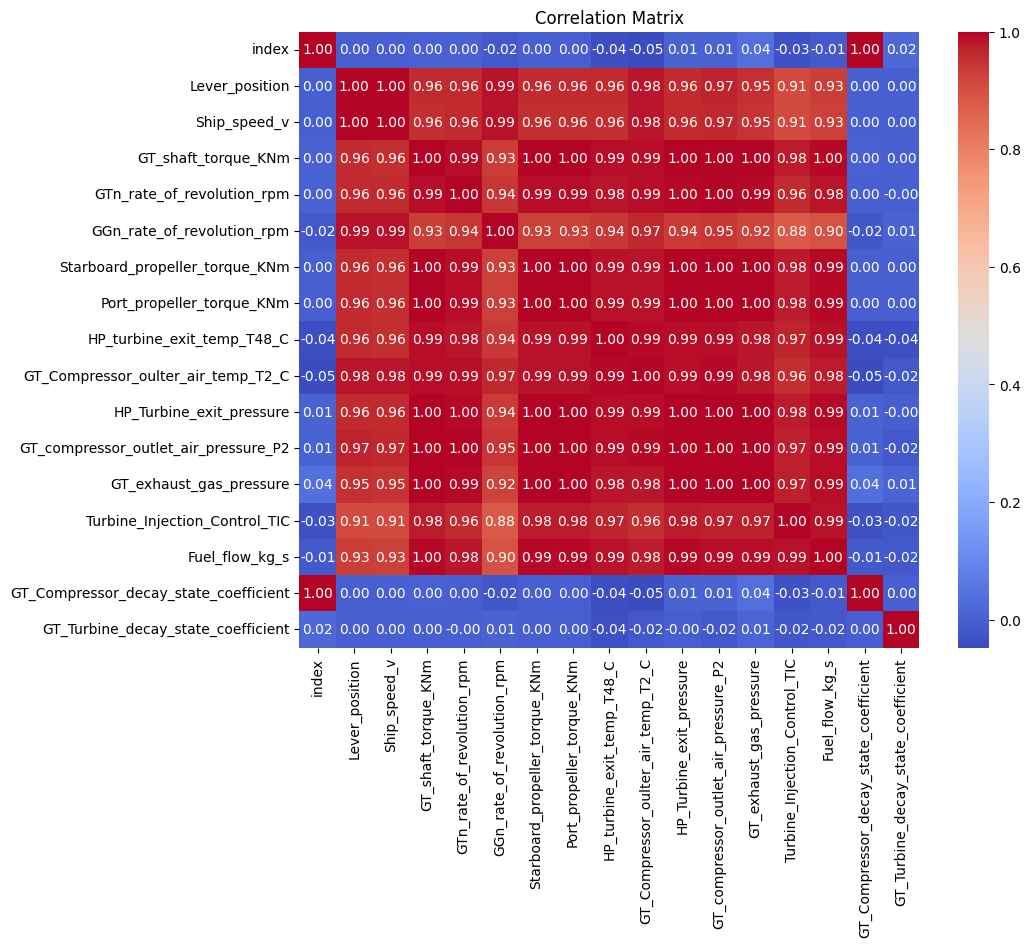

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
### VIF calculation
def calculate_vif(x):
   vif = pd.DataFrame()
   vif['Attributes'] = x.columns
   vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
   return (vif)
X = df.iloc[:,:-1]
calculate_vif(X)


,Attributes,VIF
0,index,1.079793e+04
1,Lever_position,2.665857e+05
2,Ship_speed_v,2.156185e+05
3,GT_shaft_torque_KNm,5.556405e+04
4,GTn_rate_of_revolution_rpm,1.341816e+04
5,GGn_rate_of_revolution_rpm,1.657276e+04
6,Starboard_propeller_torque_KNm,inf
7,Port_propeller_torque_KNm,inf
8,HP_turbine_exit_temp_T48_C,7.626752e+04
9,GT_Compressor_oulter_air_temp_T2_C,2.737329e+05


In [ ]:
df.drop(['GT_Compressor_oulter_air_temp_T2_C', 'GT_exhaust_gas_pressure'], axis=1, inplace=True)

In [ ]:
df.columns.to_list()

['index',
 'Lever_position',
 'Ship_speed_v',
 'GT_shaft_torque_KNm',
 'GTn_rate_of_revolution_rpm',
 'GGn_rate_of_revolution_rpm',
 'Starboard_propeller_torque_KNm',
 'Port_propeller_torque_KNm',
 'HP_turbine_exit_temp_T48_C',
 'HP_Turbine_exit_pressure',
 'GT_compressor_outlet_air_pressure_P2',
 'Turbine_Injection_Control_TIC',
 'Fuel_flow_kg_s',
 'GT_Compressor_decay_state_coefficient',
 'GT_Turbine_decay_state_coefficient']

In [ ]:
df.shape

(11934, 15)

# Feature Engineering

In [ ]:
df_feat = df.copy()

In [ ]:
df_feat['total_propeller_torque'] = df_feat['Starboard_propeller_torque_KNm']*2

In [ ]:
df_feat['total_torque'] = df_feat['total_propeller_torque'] + df_feat['GT_shaft_torque_KNm']

In [ ]:
#omega = (rpm * 2 * pi)/60*
#Power Calculation :
#total_power = Angular speed * torque
#power = omega * T*

def total_power_calculation(df_feat):
  omega = (df_feat['GGn_rate_of_revolution_rpm']*2*np.pi)/60
  power = df_feat['GT_shaft_torque_KNm']*omega
  return power



In [ ]:
df_feat['total_power'] = df_feat.apply(total_power_calculation, axis = 1)

In [ ]:
df_feat['total_pressure'] = df_feat['HP_Turbine_exit_pressure'] + df_feat['GT_compressor_outlet_air_pressure_P2']

In [ ]:
# Converting speed from knots to m/2
df_feat['ship_speed_ms'] = df_feat['Ship_speed_v']*0.5144

In [ ]:
df_feat['fuel_efficiency'] = df_feat['ship_speed_ms'] / df_feat['Fuel_flow_kg_s']

In [ ]:
df_feat['system_efficiency'] = df_feat['total_power'] / df_feat['Fuel_flow_kg_s']

In [ ]:
#thermal_load = fuel_flow * absorbed air
#where absorbed air = escape_gas_pressure * (outlet_air_temperature - inlet_air_temperature)

df_feat['GT_thermal_load'] = (df_feat['Fuel_flow_kg_s'] *df_feat['total_pressure']* (df_feat['HP_turbine_exit_temp_T48_C'] - 288.0))


In [ ]:
df_feat['compressor_turbine_decay_ratio'] = (df_feat['GT_Compressor_decay_state_coefficient'] / df_feat['GT_Turbine_decay_state_coefficient'])

In [ ]:
df_feat['coff_turb_decay_diff_abs'] = abs(df_feat['GT_Compressor_decay_state_coefficient'] - df_feat['GT_Turbine_decay_state_coefficient'])

In [ ]:
df_feat['diff_comp_turb_decay_speed_norm'] = (df_feat['GT_Compressor_decay_state_coefficient']
                                                 - df_feat['GT_Turbine_decay_state_coefficient'])/ df_feat['ship_speed_ms']

In [ ]:
df_feat.columns.to_list()

['index',
 'Lever_position',
 'Ship_speed_v',
 'GT_shaft_torque_KNm',
 'GTn_rate_of_revolution_rpm',
 'GGn_rate_of_revolution_rpm',
 'Starboard_propeller_torque_KNm',
 'Port_propeller_torque_KNm',
 'HP_turbine_exit_temp_T48_C',
 'HP_Turbine_exit_pressure',
 'GT_compressor_outlet_air_pressure_P2',
 'Turbine_Injection_Control_TIC',
 'Fuel_flow_kg_s',
 'GT_Compressor_decay_state_coefficient',
 'GT_Turbine_decay_state_coefficient',
 'total_propeller_torque',
 'total_torque',
 'total_power',
 'total_pressure',
 'ship_speed_ms',
 'fuel_efficiency',
 'system_efficiency',
 'GT_thermal_load',
 'compressor_turbine_decay_ratio',
 'coff_turb_decay_diff_abs',
 'diff_comp_turb_decay_speed_norm']

In [ ]:
df_feat.shape[1]

26

In [ ]:
# Dropping Redundant Columns

drop_cols = [
       'Ship_speed_v', 'GT_shaft_torque_KNm', 'Starboard_propeller_torque_KNm', 'Port_propeller_torque_KNm',
       'GTn_rate_of_revolution_rpm', 'GGn_rate_of_revolution_rpm', 'Fuel_flow_kg_s',
       'HP_turbine_exit_temp_T48_C', 'GT_compressor_outlet_air_pressure_P2', 'total_pressure',
       'HP_Turbine_exit_pressure', 'ship_speed_ms', 'total_power', 'GT_Compressor_decay_state_coefficient'
]
df_feat.drop(columns=drop_cols, axis=1, inplace=True)

In [ ]:
df_feat.drop(columns = ['index', 'total_propeller_torque'], axis = 1, inplace = True)

In [ ]:
df_feat.columns.to_list()

['Lever_position',
 'Turbine_Injection_Control_TIC',
 'GT_Turbine_decay_state_coefficient',
 'total_torque',
 'fuel_efficiency',
 'system_efficiency',
 'GT_thermal_load',
 'compressor_turbine_decay_ratio',
 'coff_turb_decay_diff_abs',
 'diff_comp_turb_decay_speed_norm']

In [ ]:
df_feat.shape

(11934, 10)

In [ ]:
# checking VIF post feature engineering

x = df_feat.iloc[:,:-1]
calculate_vif(x)

,Attributes,VIF
0,Lever_position,3074.781075
1,Turbine_Injection_Control_TIC,129.884127
2,GT_Turbine_decay_state_coefficient,5795.520842
3,total_torque,2653.191856
4,fuel_efficiency,142.180647
5,system_efficiency,222.120357
6,GT_thermal_load,263.313938
7,compressor_turbine_decay_ratio,5259.773292
8,coff_turb_decay_diff_abs,7.414173


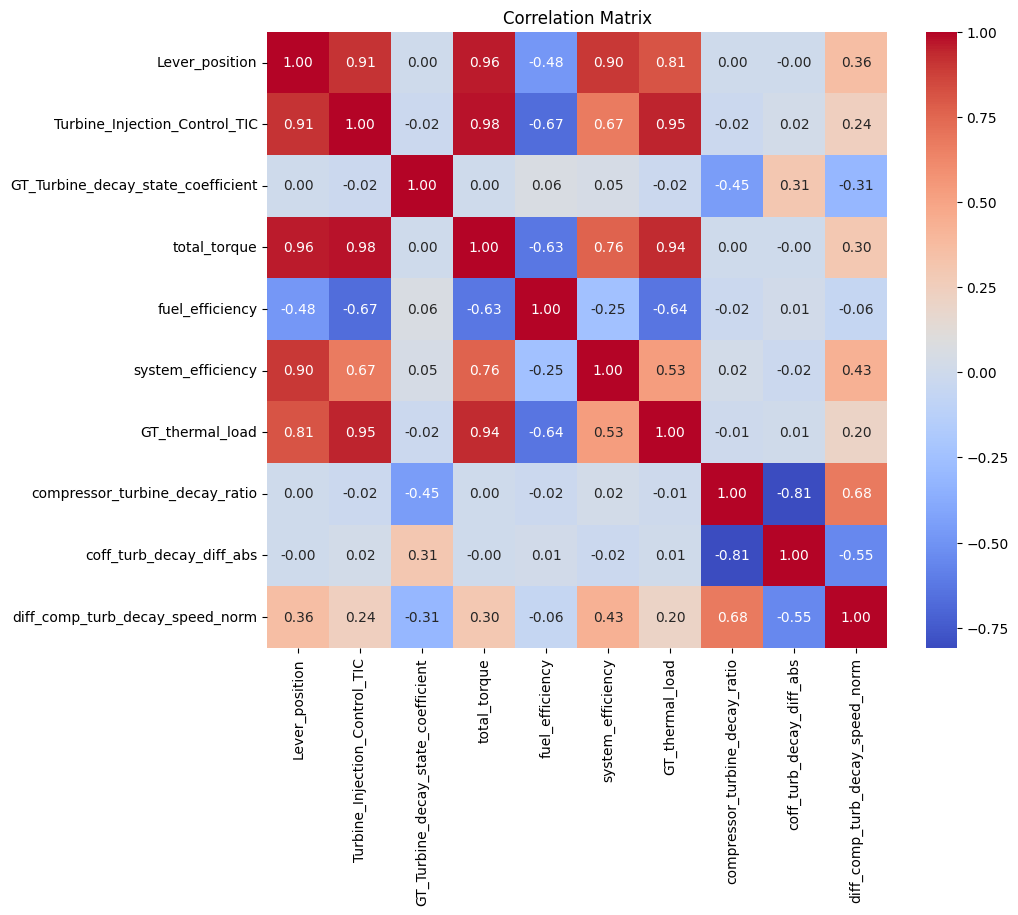

In [ ]:
correlation_matrix = df_feat.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

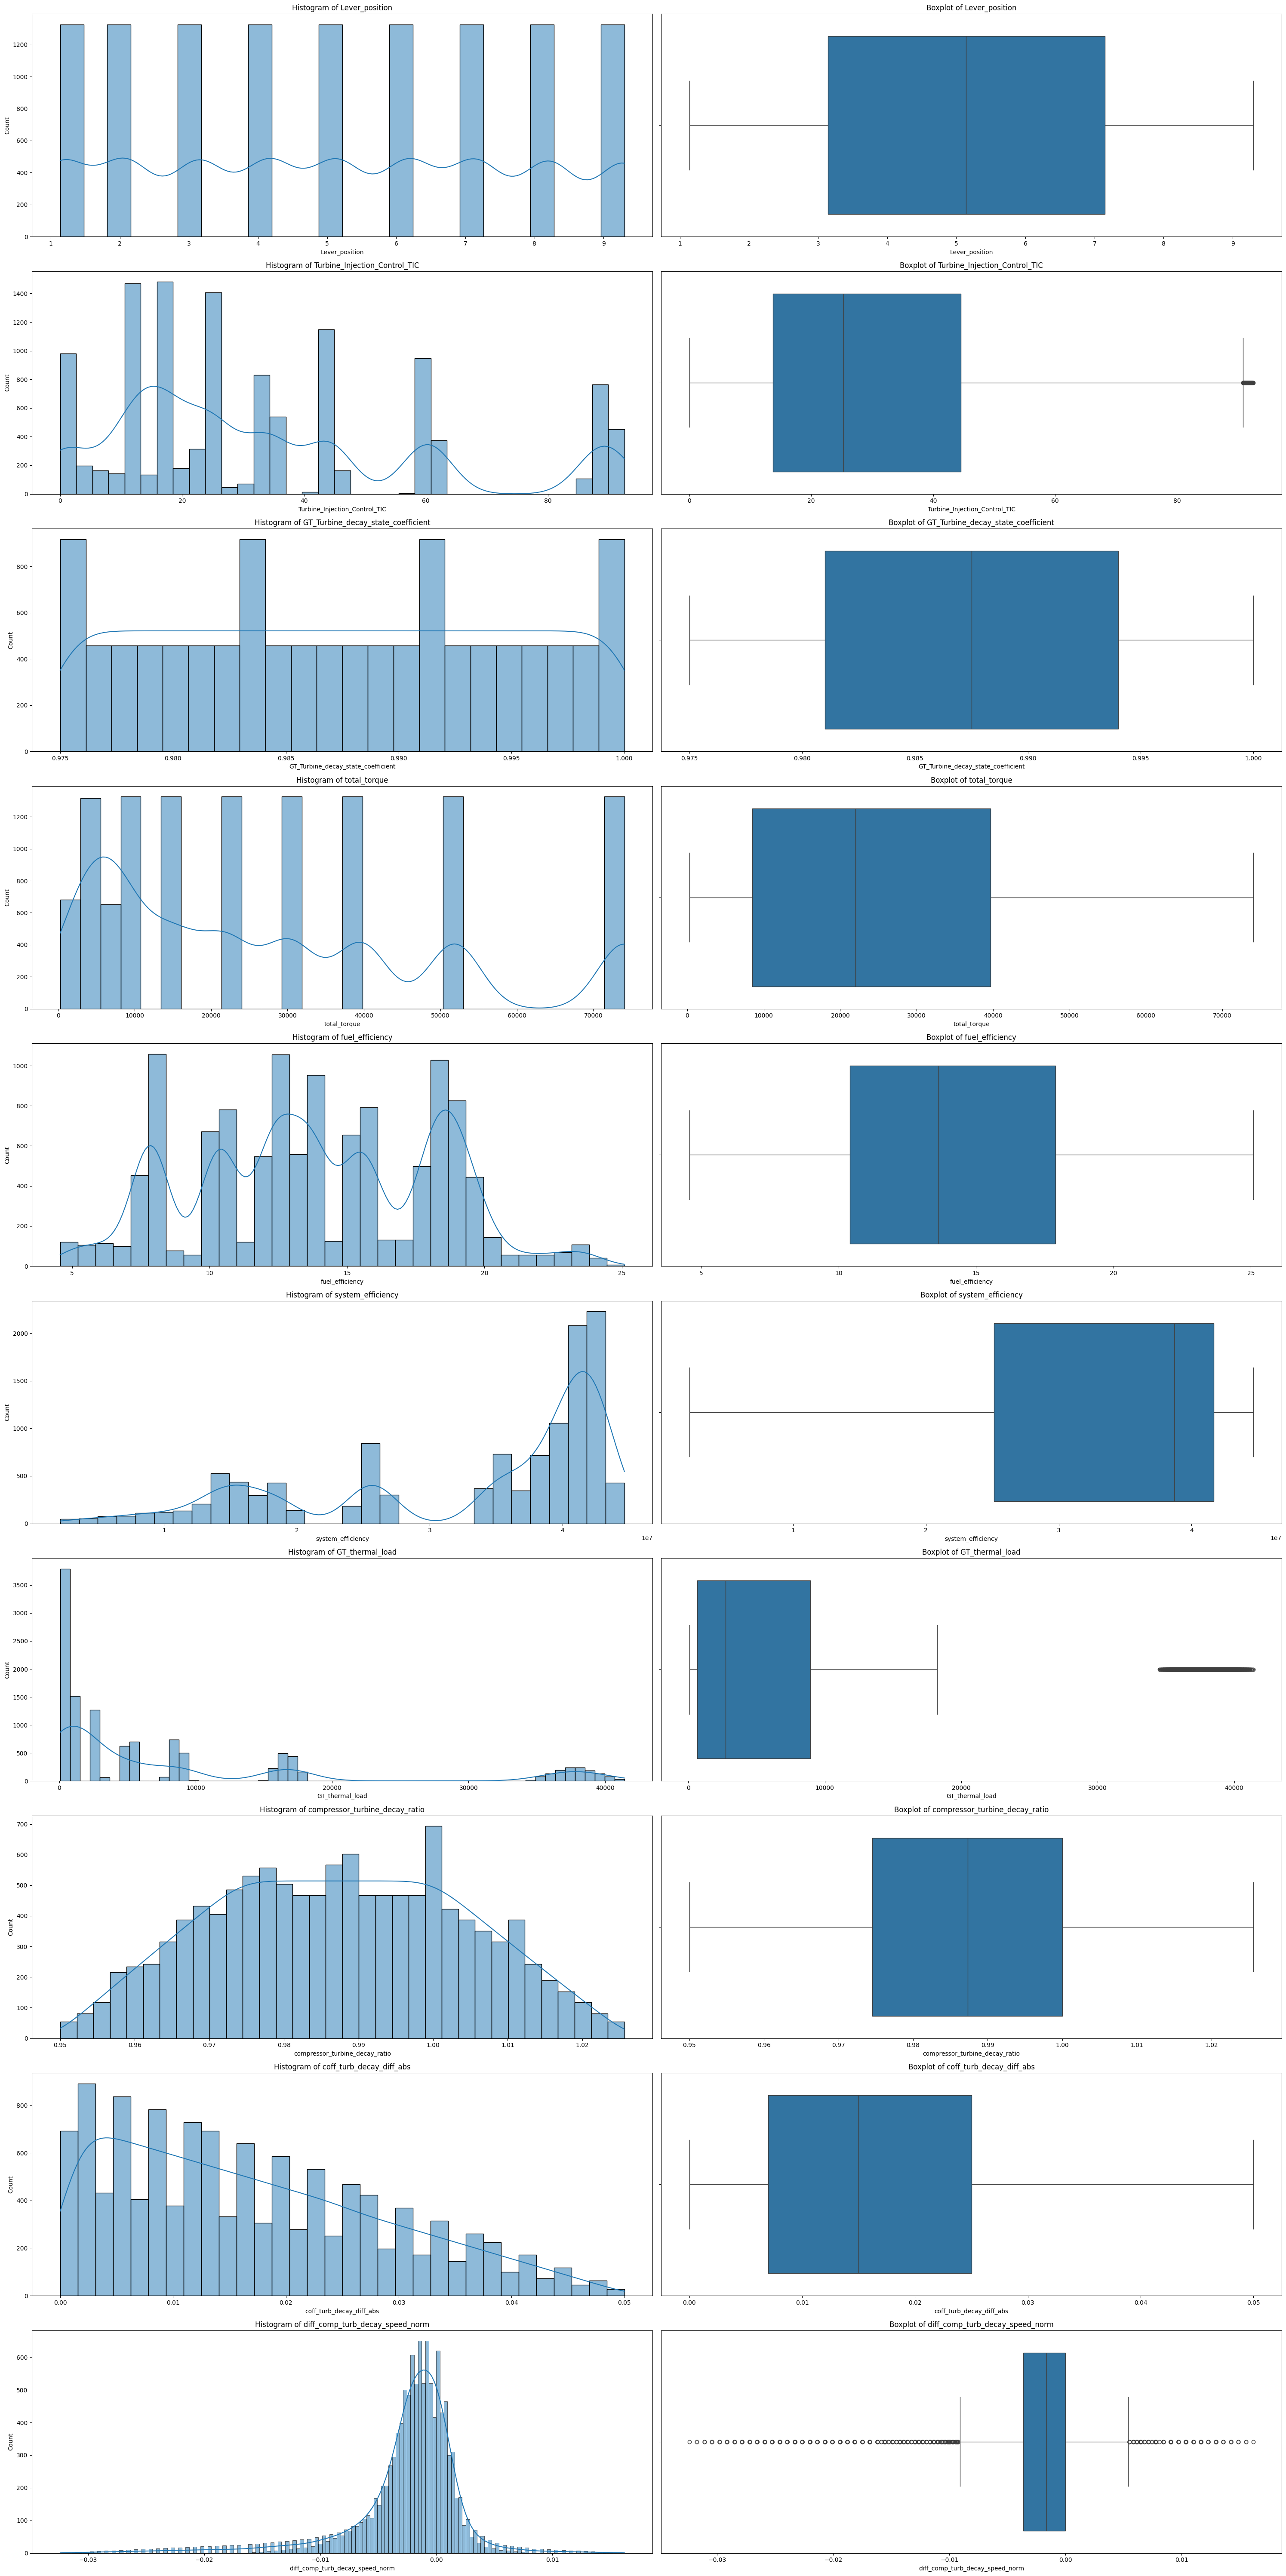

In [ ]:
n_columns = len(df_feat.columns)
fig, ax = plt.subplots(nrows=n_columns, ncols=2, figsize=(30, 6 * n_columns))
for i, column in enumerate(df_feat.columns):
# Histogram
     sns.histplot(data=df_feat, x=column, kde=True, ax=ax[i, 0])
     ax[i, 0].set_title(f'Histogram of {column}')
# Boxplot
     sns.boxplot(data=df_feat, x=column, ax=ax[i, 1])
     ax[i, 1].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Data Preparation

In [ ]:
df_model = df_feat.copy()

In [ ]:
# Data Spliting

x = df_model.iloc[:,:-1]
y = df_model.iloc[:,-1]

In [ ]:
# Data Spliting
x = df_model.iloc[:,:-1]
y = df_model.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42) #Corrected the order of variables returned by train_test_split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.4, random_state = 42)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = y_train.reset_index(drop=True)
Y_val = y_val.reset_index(drop=True)
Y_test = y_test.reset_index(drop=True)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Model Training

In [ ]:
def adjusted_r2(r_squared, n, k):

   if n == k + 1:
        raise ValueError("Number of observations must be greater than number of predictors + 1")
   adj_r2 = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
   return adj_r2

In [ ]:
def predict_evaluate_model(model,X, Y):
   model_at_hand = model
   y_pred = model_at_hand.predict(X)
   print('mean_absolute_error : ', mean_absolute_error(Y, y_pred))
   print('mean_squared_error : ', mean_squared_error(Y, y_pred))
   print('root_mean_squared_error : ', sqrt(mean_squared_error(Y, y_pred)))
   R2_Score = r2_score(Y, y_pred)
   print('r2 : ', R2_Score)
   n = len(Y_train)
   k = X_train.shape[1]
   print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

# Linear Regression

In [ ]:
Linear_regression = LinearRegression()
Linear_regression.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Training Data
predict_evaluate_model(Linear_regression, X_train, Y_train)

mean_absolute_error :  0.0017508485290918668
mean_squared_error :  7.796896557725614e-06
root_mean_squared_error :  0.0027922923481837666
r2 :  0.6784364658709598
Adjusted-r2 : 0.6779506388091567


In [ ]:
# Testing Data
predict_evaluate_model(Linear_regression, X_test, Y_test)

mean_absolute_error :  0.0017308177360391083
mean_squared_error :  7.498954858561969e-06
root_mean_squared_error :  0.002738421965030585
r2 :  0.6859751616949491
Adjusted-r2 : 0.6855007243028481


In [ ]:
# Validation Data
predict_evaluate_model(Linear_regression, X_val, Y_val)

mean_absolute_error :  0.0018267246676153311
mean_squared_error :  8.414104373750602e-06
root_mean_squared_error :  0.002900707564328159
r2 :  0.6610211981565851
Adjusted-r2 : 0.6605090596276963


# Decision Tree

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth = 10, random_state = 42)
decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
# Training Data
predict_evaluate_model(decision_tree, X_train, Y_train)

mean_absolute_error :  3.4707512523650797e-05
mean_squared_error :  3.698079537345701e-09
root_mean_squared_error :  6.0811837148253474e-05
r2 :  0.9998474819414731
Adjusted-r2 : 0.9998472515129811


In [ ]:
# Testing Data

predict_evaluate_model(decision_tree, X_test, Y_test)

mean_absolute_error :  5.371024651634709e-05
mean_squared_error :  1.99116714133646e-08
root_mean_squared_error :  0.00014110872196063784
r2 :  0.9991661825529159
Adjusted-r2 : 0.9991649227985053


In [ ]:
# Validation Data

predict_evaluate_model(decision_tree, X_val, Y_val)

mean_absolute_error :  5.3842839755676174e-05
mean_squared_error :  1.6511678767822267e-08
root_mean_squared_error :  0.00012849777728747789
r2 :  0.9993347944312884
Adjusted-r2 : 0.999333789420357


# Random Forest

In [ ]:
random_forest = RandomForestRegressor(n_estimators = 100, max_depth = 10,min_samples_split = 5, min_samples_leaf = 2, random_state = 42)
random_forest.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [ ]:
# Training Data
predict_evaluate_model(random_forest, X_train, Y_train)

mean_absolute_error :  2.07355698942861e-05
mean_squared_error :  2.188913633591063e-09
root_mean_squared_error :  4.678582727270154e-05
r2 :  0.9999097237216488
Adjusted-r2 : 0.999909587329756


In [ ]:
# Testing Data

predict_evaluate_model(random_forest, X_test, Y_test)

mean_absolute_error :  3.2128594145153874e-05
mean_squared_error :  6.9275284324288204e-09
root_mean_squared_error :  8.323177537712879e-05
r2 :  0.9997099041083888
Adjusted-r2 : 0.9997094658235097


In [ ]:
# validation Data

predict_evaluate_model(random_forest, X_val, Y_val)

mean_absolute_error :  3.246331415959905e-05
mean_squared_error :  6.009991904038183e-09
root_mean_squared_error :  7.752413755752581e-05
r2 :  0.9997578756140612
Adjusted-r2 : 0.9997575098058568


# Gradient Booster

In [ ]:
gradient_booster = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 5, min_samples_split = 5, min_samples_leaf = 2, random_state = 42)
gradient_booster.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                          random_state=42)

In [ ]:
# Training Data
predict_evaluate_model(gradient_booster, X_train, Y_train)

mean_absolute_error :  4.0910237756705904e-05
mean_squared_error :  3.5397086180376063e-09
root_mean_squared_error :  5.949545039780442e-05
r2 :  0.9998540135546783
Adjusted-r2 : 0.9998537929943278


In [ ]:
# Testing Data
predict_evaluate_model(gradient_booster, X_test, Y_test)

mean_absolute_error :  5.55535645153578e-05
mean_squared_error :  7.907266426400738e-09
root_mean_squared_error :  8.892281161997037e-05
r2 :  0.9996688767824559
Adjusted-r2 : 0.9996683765123605


In [ ]:
# Validation Datam

predict_evaluate_model(gradient_booster, X_val, Y_val)

mean_absolute_error :  5.8724431450746057e-05
mean_squared_error :  9.123372638490083e-09
root_mean_squared_error :  9.551634749345309e-05
r2 :  0.9996324469262095
Adjusted-r2 : 0.9996318916168819


# AdaBoostRegressor

In [ ]:
base_estimator = DecisionTreeRegressor(max_depth = 10)
adaboost_regressor = AdaBoostRegressor(base_estimator = base_estimator, n_estimators = 100, learning_rate = 0.1, random_state = 42)
adaboost_regressor.fit(X_train, Y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
# Training Data
predict_evaluate_model(adaboost_regressor, X_train, Y_train)

mean_absolute_error :  6.697000062418815e-06
mean_squared_error :  2.442527148544579e-10
root_mean_squared_error :  1.5628586463735546e-05
r2 :  0.9999899264065353
Adjusted-r2 : 0.9999899111870723


In [ ]:
# Testing Data
predict_evaluate_model(adaboost_regressor, X_test, Y_test)

mean_absolute_error :  1.4175328924904485e-05
mean_squared_error :  4.1694493721377215e-09
root_mean_squared_error :  6.457127358305488e-05
r2 :  0.9998254009139138
Adjusted-r2 : 0.999825137124796


In [ ]:
# Validation Data
predict_evaluate_model(adaboost_regressor, X_val, Y_val)

mean_absolute_error :  1.5228776654854048e-05
mean_squared_error :  2.548277826562688e-09
root_mean_squared_error :  5.048046975378387e-05
r2 :  0.9998973375981516
Adjusted-r2 : 0.9998971824929617


# XGBoostRegressor

In [ ]:
xgboost = XGBRegressor(n_estimators = 100, max_depth = 8, n_jobs = 2)
xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=2,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Training Data
predict_evaluate_model(xgboost, X_train, Y_train)

mean_absolute_error :  6.331146031362633e-05
mean_squared_error :  1.0126780813296002e-08
root_mean_squared_error :  0.00010063190753084234
r2 :  0.9995823462061393
Adjusted-r2 : 0.9995817152032612


In [ ]:
# Testing Data
predict_evaluate_model(xgboost, X_test, Y_test)

mean_absolute_error :  7.576493324703204e-05
mean_squared_error :  1.8162940052218697e-08
root_mean_squared_error :  0.00013476995233440835
r2 :  0.9992394121020037
Adjusted-r2 : 0.9992382629848169


In [ ]:
# Validation Data
predict_evaluate_model(xgboost, X_val, Y_val)

mean_absolute_error :  7.798368917585698e-05
mean_squared_error :  1.8657611221966452e-08
root_mean_squared_error :  0.00013659286665842566
r2 :  0.9992483413068879
Adjusted-r2 : 0.9992472056801902


# Result Evaluation

In [ ]:
Model_evaluation_scores = {
  'Model': [
    'LinearRegression',
    'DecisionTreeRegressor',
    'RandomForestRegressor',
    'GradientBoostingRegressor',
    'AdaBoostRegressor',
    'XGBoostRegressor'
  ],
  'R² Score': [
     0.21223,
     0.75389,
     0.80337,
     0.94430,
     0.94989,
     0.97110
    ],
  'Adjusted R² Score': [
     0.21108,
     0.75353,
     0.80308,
     0.94422,
     0.94981,
     0.97106
   ]
}
result = pd.DataFrame(Model_evaluation_scores)
result.index = result.index + 1
result

,Model,R² Score,Adjusted R² Score
1,LinearRegression,0.21223,0.21108
2,DecisionTreeRegressor,0.75389,0.75353
3,RandomForestRegressor,0.80337,0.80308
4,GradientBoostingRegressor,0.94430,0.94422
5,AdaBoostRegressor,0.94989,0.94981
6,XGBoostRegressor,0.97110,0.97106
